In [95]:
import os
import numpy as np
import pandas as pd
from osgeo import gdal

path = r'G:\0_Chang\yunnan_zhaotong'

In [17]:
qz_gpp = []
for dirpath,filename,filenames in os.walk(path):#遍历源文件
        for filename in filenames:
                if os.path.splitext(filename)[1] == '.tif':#判断是否为tif格式
                    if filename[-12:-9] == 'Gpp':
                        ds = gdal.Open(path+'//'+filename)
                        tr = ds.GetGeoTransform()
                        prj = ds.GetProjection()
                        x1 = ds.RasterXSize
                        y1 = ds.RasterYSize
                        im_bands = ds.RasterCount #波段数
                        arr = ds.ReadAsArray(0, 0, x1, y1).reshape(-1, 1)
                        qz_gpp.append(np.sum(arr))


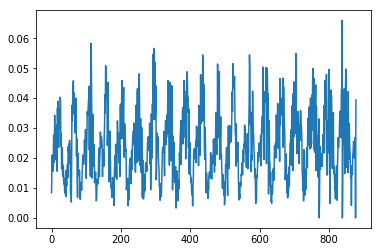

In [98]:
dt = pd.read_csv(r'G:\0_Chang\yunnan_zhaotong\statistics_Gpp_500m.csv')
plt.plot(dt['mean'])

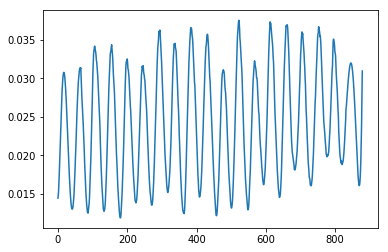

In [123]:
import tensorflow as tf
from scipy import interpolate
from scipy. signal import savgol_filter
from tensorflow.contrib.timeseries.python.timeseries import NumpyReader

x = np.array(range(len(qz_gpp)))
y = dt['mean']
y = savgol_filter(y, 93, 6)#smooth wave

plt.plot(y)
#
#read data
data = {
   tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
   tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}

reader = NumpyReader(data)

In [119]:
train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(
   reader, batch_size=10, window_size=50)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ThinkPad\\AppData\\Local\\Temp\\tmpf0j012hi', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002215200F470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

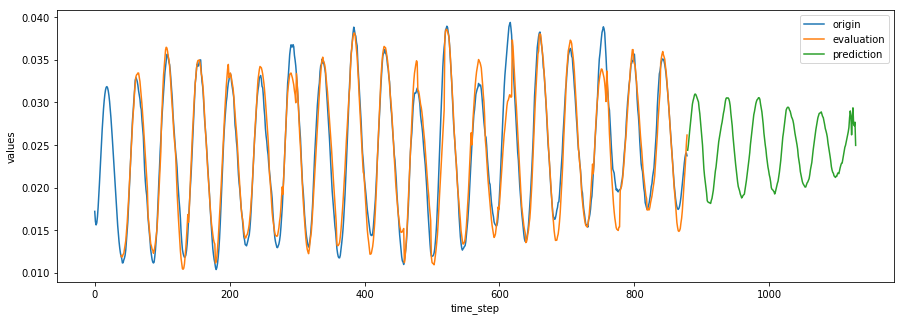

In [120]:
#ar模型
ar = tf.contrib.timeseries.ARRegressor(
   periodicities=50, input_window_size=30, output_window_size=20,
   num_features=1,
   loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)
#使用训练好的模型在原先的训练集上进行计算，由此我们可以观察到模型的拟合效果
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1)
#这里的代码在1000步之后又像后预测了250个时间点。对应的值就保存在predictions[‘mean’]中
(predictions,) = tuple(ar.predict(
   input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
       evaluation, steps=250)))

plt.figure(figsize=(15, 5))
plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend(loc=0)
plt.show()

In [91]:
#plt.scatter(evaluation['mean'].reshape(1,-1), y)
#plt.ahow()
len(evaluation['mean'].reshape(-1,1)),len(y)

(840, 879)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ThinkPad\\AppData\\Local\\Temp\\tmp51ybkxsm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022150B6B860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\ThinkPad\AppData\Local\Temp\tmp51ybkxsm\model.ckpt-6000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring pa

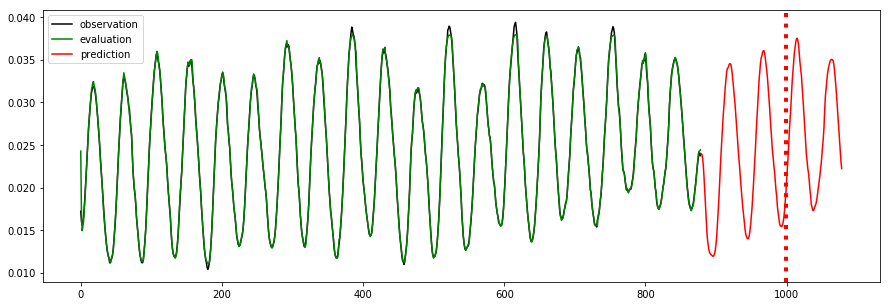

In [121]:
#LSTM
from tensorflow.contrib.timeseries.python.timeseries.estimators import TimeSeriesRegressor
from tensorflow.contrib.timeseries.python.timeseries import estimators as ts_estimators
from tensorflow.contrib.timeseries.python.timeseries import model as ts_model
from tensorflow.contrib.timeseries.python.timeseries import state_management

class _LSTMModel(ts_model.SequentialTimeSeriesModel):
  """A time series model-building example using an RNNCell."""

  def __init__(self, num_units, num_features, dtype=tf.float32):
    """Initialize/configure the model object.
    Note that we do not start graph building here. Rather, this object is a
    configurable factory for TensorFlow graphs which are run by an Estimator.
    Args:
      num_units: The number of units in the model's LSTMCell.
      num_features: The dimensionality of the time series (features per
        timestep).
      dtype: The floating point data type to use.
    """
    super(_LSTMModel, self).__init__(
        # Pre-register the metrics we'll be outputting (just a mean here).
        train_output_names=["mean"],
        predict_output_names=["mean"],
        num_features=num_features,
        dtype=dtype)
    self._num_units = num_units
    # Filled in by initialize_graph()
    self._lstm_cell = None
    self._lstm_cell_run = None
    self._predict_from_lstm_output = None

  def initialize_graph(self, input_statistics):
    """Save templates for components, which can then be used repeatedly.
    This method is called every time a new graph is created. It's safe to start
    adding ops to the current default graph here, but the graph should be
    constructed from scratch.
    Args:
      input_statistics: A math_utils.InputStatistics object.
    """
    super(_LSTMModel, self).initialize_graph(input_statistics=input_statistics)
    self._lstm_cell = tf.nn.rnn_cell.LSTMCell(num_units=self._num_units)
    # Create templates so we don't have to worry about variable reuse.
    self._lstm_cell_run = tf.make_template(
        name_="lstm_cell",
        func_=self._lstm_cell,
        create_scope_now_=True)
    # Transforms LSTM output into mean predictions.
    self._predict_from_lstm_output = tf.make_template(
        name_="predict_from_lstm_output",
        func_=lambda inputs: tf.layers.dense(inputs=inputs, units=self.num_features),
        create_scope_now_=True)

  def get_start_state(self):
    """Return initial state for the time series model."""
    return (
        # Keeps track of the time associated with this state for error checking.
        tf.zeros([], dtype=tf.int64),
        # The previous observation or prediction.
        tf.zeros([self.num_features], dtype=self.dtype),
        # The state of the RNNCell (batch dimension removed since this parent
        # class will broadcast).
        [tf.squeeze(state_element, axis=0)
         for state_element
         in self._lstm_cell.zero_state(batch_size=1, dtype=self.dtype)])

  def _transform(self, data):
    """Normalize data based on input statistics to encourage stable training."""
    mean, variance = self._input_statistics.overall_feature_moments
    return (data - mean) / variance

  def _de_transform(self, data):
    """Transform data back to the input scale."""
    mean, variance = self._input_statistics.overall_feature_moments
    return data * variance + mean

  def _filtering_step(self, current_times, current_values, state, predictions):
    """Update model state based on observations.
    Note that we don't do much here aside from computing a loss. In this case
    it's easier to update the RNN state in _prediction_step, since that covers
    running the RNN both on observations (from this method) and our own
    predictions. This distinction can be important for probabilistic models,
    where repeatedly predicting without filtering should lead to low-confidence
    predictions.
    Args:
      current_times: A [batch size] integer Tensor.
      current_values: A [batch size, self.num_features] floating point Tensor
        with new observations.
      state: The model's state tuple.
      predictions: The output of the previous `_prediction_step`.
    Returns:
      A tuple of new state and a predictions dictionary updated to include a
      loss (note that we could also return other measures of goodness of fit,
      although only "loss" will be optimized).
    """
    state_from_time, prediction, lstm_state = state
    with tf.control_dependencies(
            [tf.assert_equal(current_times, state_from_time)]):
      transformed_values = self._transform(current_values)
      # Use mean squared error across features for the loss.
      predictions["loss"] = tf.reduce_mean(
          (prediction - transformed_values) ** 2, axis=-1)
      # Keep track of the new observation in model state. It won't be run
      # through the LSTM until the next _imputation_step.
      new_state_tuple = (current_times, transformed_values, lstm_state)
    return (new_state_tuple, predictions)

  def _prediction_step(self, current_times, state):
    """Advance the RNN state using a previous observation or prediction."""
    _, previous_observation_or_prediction, lstm_state = state
    lstm_output, new_lstm_state = self._lstm_cell_run(
        inputs=previous_observation_or_prediction, state=lstm_state)
    next_prediction = self._predict_from_lstm_output(lstm_output)
    new_state_tuple = (current_times, next_prediction, new_lstm_state)
    return new_state_tuple, {"mean": self._de_transform(next_prediction)}

  def _imputation_step(self, current_times, state):
    """Advance model state across a gap."""
    # Does not do anything special if we're jumping across a gap. More advanced
    # models, especially probabilistic ones, would want a special case that
    # depends on the gap size.
    return state

  def _exogenous_input_step(
          self, current_times, current_exogenous_regressors, state):
    """Update model state based on exogenous regressors."""
    raise NotImplementedError(
        "Exogenous inputs are not implemented for this example.")





data = {
   tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
   tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size=4, window_size=40)

estimator = ts_estimators.TimeSeriesRegressor(
    model=_LSTMModel(num_features=1, num_units=128),
    optimizer=tf.train.AdamOptimizer(0.001))

estimator.train(input_fn=train_input_fn, steps=6000)
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = estimator.evaluate(input_fn=evaluation_input_fn, steps=1)
  # Predict starting after the evaluation
(predictions,) = tuple(estimator.predict(
    input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
        evaluation, steps=200)))

observed_times = evaluation["times"][0]
observed = evaluation["observed"][0, :, :]
evaluated_times = evaluation["times"][0]
evaluated = evaluation["mean"][0]
predicted_times = predictions['times']
predicted = predictions["mean"]

plt.figure(figsize=(15, 5))
plt.axvline(999, linestyle="dotted", linewidth=4, color='r')
observed_lines = plt.plot(observed_times, observed, label="observation", color="k")
evaluated_lines = plt.plot(evaluated_times, evaluated, label="evaluation", color="g")
predicted_lines = plt.plot(predicted_times, predicted, label="prediction", color="r")
plt.legend(handles=[observed_lines[0], evaluated_lines[0], predicted_lines[0]],
            loc="upper left")
plt.show()